# Taller 1 Ciencia de datos

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Load the data

In [ ]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./listings.csv.gz")
# Showing dataframe dimensions
listings_df.shape

(45533, 75)

In [ ]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
39784,31697856,https://www.airbnb.com/rooms/31697856,20240904164210,2024-09-05,previous scrape,PRIVATE PENTHOUSE,Very modern clean custom furniture styled room...,Downtown LA contains many diverse neighborhood...,https://a0.muscache.com/pictures/60c75227-396f...,37160531,https://www.airbnb.com/users/show/37160531,Chris,2015-06-30,"New York, NY",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,1.0,7.0,['phone'],t,f,Neighborhood highlights,Downtown,City of Los Angeles,34.043070,-118.253470,Entire loft,Entire home/apt,3,NaN,1 bath,1.0,NaN,"[""Free street parking"", ""Gym"", ""Carbon monoxid...",NaN,30,180,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,f,0,0,0,0,2024-09-05,16,0,0,2019-03-10,2019-11-16,4.75,4.88,4.88,4.88,4.88,4.88,4.63,NaN,f,1,1,0,0,0.24
16904,935656379691626191,https://www.airbnb.com/rooms/935656379691626191,20240904164210,2024-09-04,city scrape,"2 Guest Rooms 4 Beds by Beach, Walk to Ocean 1|2",In need of a vacation or staycation? In town f...,"A lively beach 🏖️ town with great food 🍱, beau...",https://a0.muscache.com/pictures/hosting/Hosti...,32339430,https://www.airbnb.com/users/show/32339430,Alexis,2015-05-01,"Long Beach, CA",Hello and welcome to my home!,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/477bb...,https://a0.muscache.com/im/pictures/user/477bb...,Naples,5.0,21.0,"['email', 'phone']",t,t,Neighborhood highlights,Long Beach,Other Cities,33.764477,-118.179493,Private room in condo,Private room,6,1.0,1 private bath,2.0,4.0,"[""Free street parking"", ""Toaster oven stainles...",$230.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,26,53,81,171,2024-09-04,2,2,1,2024-07-26,2024-08-11,4.50,5.00,5.00,5.00,5.00,5.00,5.00,Exempt,f,3,0,3,0,1.46
8010,527037594131249717,https://www.airbnb.com/rooms/527037594131249717,20240904164210,2024-09-04,city scrape,Brand New 2BD 2BTH Guesthouse,Brand New 2024 2 Bed 2 Bath Spacious Guesthous...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,32453978,https://www.airbnb.com/users/show/32453978,Hoan,2015-05-02,"Los Angeles, CA",NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,El Monte,Other Cities,34.088643,-118.017207,Entire guesthouse,Entire home/apt,5,2.0,2 baths,2.0,3.0,"[""Clothing storage: closet"", ""Free street park...",$154.00,2,21,1.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,4,15,36,188,2024-09-04,22,22,4,2024-02-22,2024-08-17,5.00,5.00,5.00,5.00,4.95,4.86,4.91,NaN,f,1,1,0,0,3.37
15950,29101076,https://www.airbnb.com/rooms/29101076,20240904164210,2024-09-06,city s

## 2. Entendimiento inicial de datos

In [ ]:
filas, columnas = listings_df.shape
print(f"Dimensiones del dataset: {filas} filas y {columnas} columnas")

Dimensiones del dataset: 45533 filas y 75 columnas


In [ ]:
# Showing column types
listings_df.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


In [ ]:
# Calcular la cantidad de valores vacíos por columna
valores_vacios = listings_df.isnull().sum()
# Ordenar el resultado por el número de valores vacíos de forma descendente
valores_vacios = valores_vacios.sort_values(ascending=False)

# Mostrar los valores vacíos ordenados
print(valores_vacios)


calendar_updated                                45533
license                                         32730
neighborhood_overview                           22421
neighbourhood                                   22420
host_about                                      20891
review_scores_value                             12165
review_scores_location                          12164
review_scores_checkin                           12163
review_scores_communication                     12156
review_scores_cleanliness                       12156
review_scores_accuracy                          12155
reviews_per_month                               12146
first_review                                    12146
last_review                                     12146
review_scores_rating                            12146
host_location                                   10860
host_response_time                              10088
host_response_rate                              10088
host_neighbourhood          

Revisamos la variabilidad de los datos para tener una idea de cuáles podrían ser los 5 más importantes ya que, primero no pueden tener muchos valores diferentes (como el id) o muchos valores iguales como el scrape_id

In [ ]:
valores_unicos = listings_df.nunique().sort_values(ascending=False)
print(valores_unicos)


id                                              45533
listing_url                                     45533
picture_url                                     44268
name                                            44012
amenities                                       41727
description                                     38111
longitude                                       36929
latitude                                        34373
host_id                                         23202
host_url                                        23202
host_picture_url                                22360
host_thumbnail_url                              22360
neighborhood_overview                           18933
host_about                                      11729
host_name                                        8631
license                                          7582
host_since                                       4990
first_review                                     4149
last_review                 

### Evaluación de la Variabilidad:
- Variables con poca o nula variabilidad: Algunas variables, como has_availability, instant_bookable, y host_is_superhost, tienen solo 2 valores únicos, lo que indica que no aportan mucha información diferenciada.

- Variables con alta variabilidad: Atributos como id, listing_url, y picture_url no son útiles para el análisis, aunque tienen alta variabilidad, ya que son identificadores únicos y no tienen un impacto directo en la rentabilidad o características de las propiedades.

### Remove selected properties

In [ ]:
listings_df = listings_df.loc[listings_df["room_type"] != "Hotel room"]

### Elección top 5 variables

Al revisar el diccionario de datos, el contexto y la variabilidad de cada una de las variables se escogieron las siguientes:
1. property_type (tipo de propiedad): Debido a que es un factor nombrado en la introducción y tiene una variabilidad decente que puede ayudar tomar ciertas decisiones
2. price (Precio por noche): El precio es fundamental para la rentabilidad de cualquier inversión inmobiliaria. Un análisis de este atributo ayudará a determinar rangos de precios competitivos y a predecir ingresos futuros.
3. availability_365 (Disponibilidad en los próximos 365 días): Este atributo proporciona información sobre la ocupación actual y potencial. Alta disponibilidad podría indicar baja demanda o poca competitividad del anuncio.
4. number_of_reviews (Número de reseñas): Un número alto de reseñas generalmente refleja la popularidad y confianza en la propiedad, lo que puede influir en la tasa de ocupación.
5. review_scores_rating (Puntuación de la propiedad): Las propiedades con mejores puntuaciones tienden a tener mayor demanda, lo que puede influir en el precio y la tasa de ocupación.

In [ ]:
# Calculating the relative frecuency of room types
listings_df["property_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

,proportion
property_type,
Entire home,0.273865
Entire rental unit,0.259100
Private room in home,0.128854
Entire guesthouse,0.060891
Private room in rental unit,0.050746
Entire condo,0.038767
Entire guest suite,0.027981
Entire townhouse,0.016378
Entire villa,0.015670


In [ ]:
# We need to transform the price attribute from object to float
listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price"].quantile(0.25)
q3 = listings_df["price"].quantile(0.75)
iqr = q3 - q1

<ipython-input-62-1f8f15ee1079>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)


[]

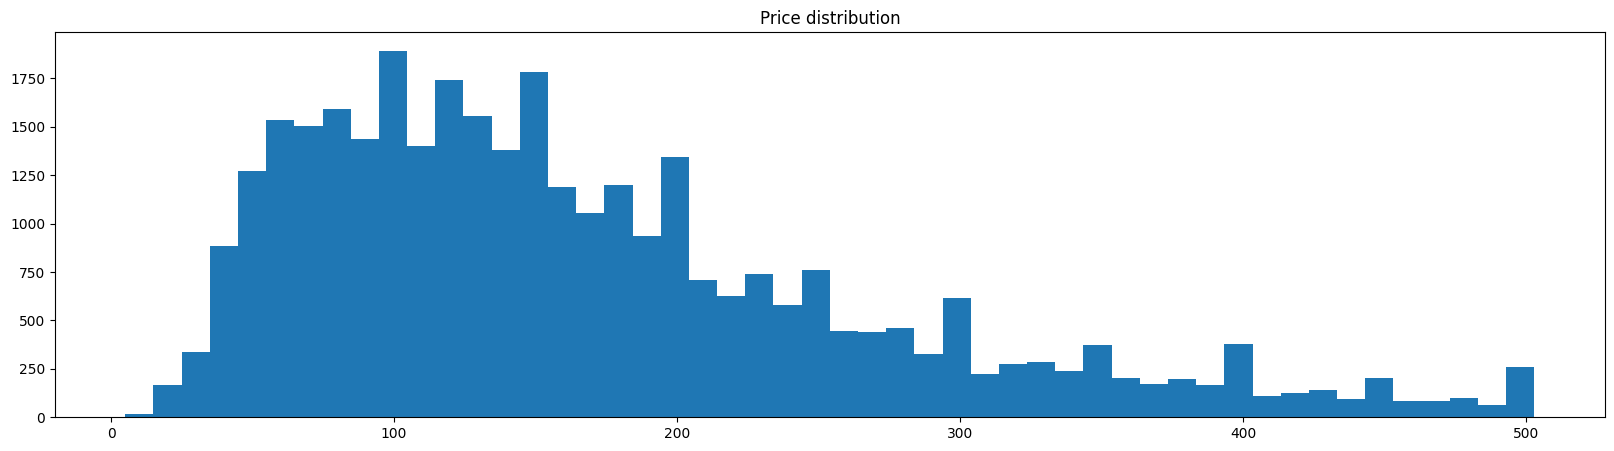

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution")
plt.plot()

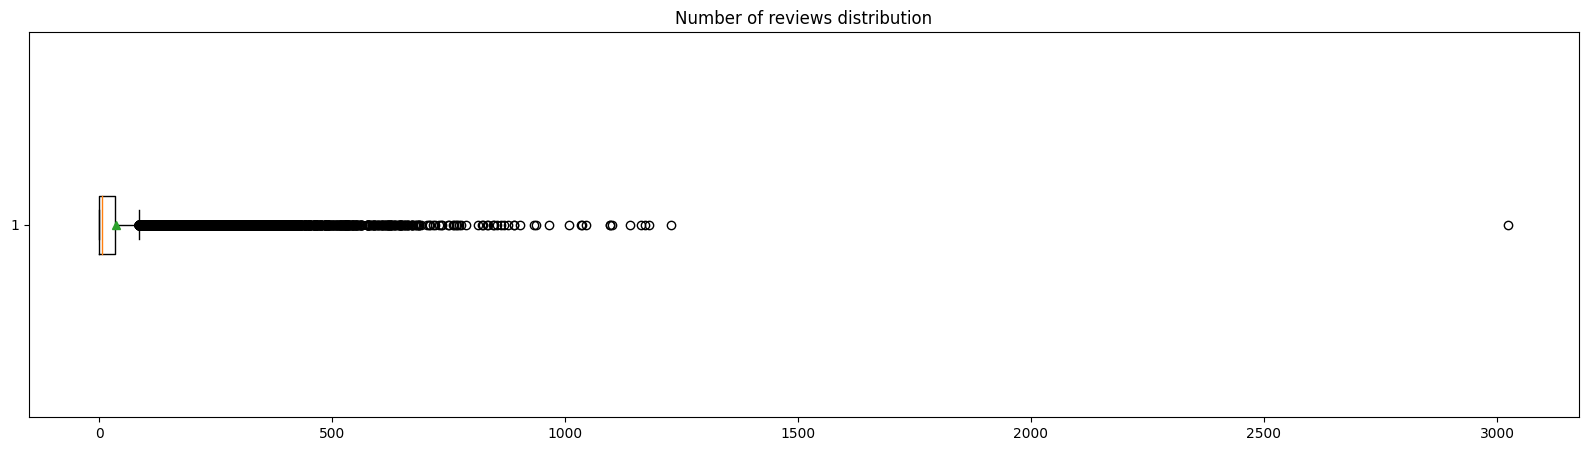

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

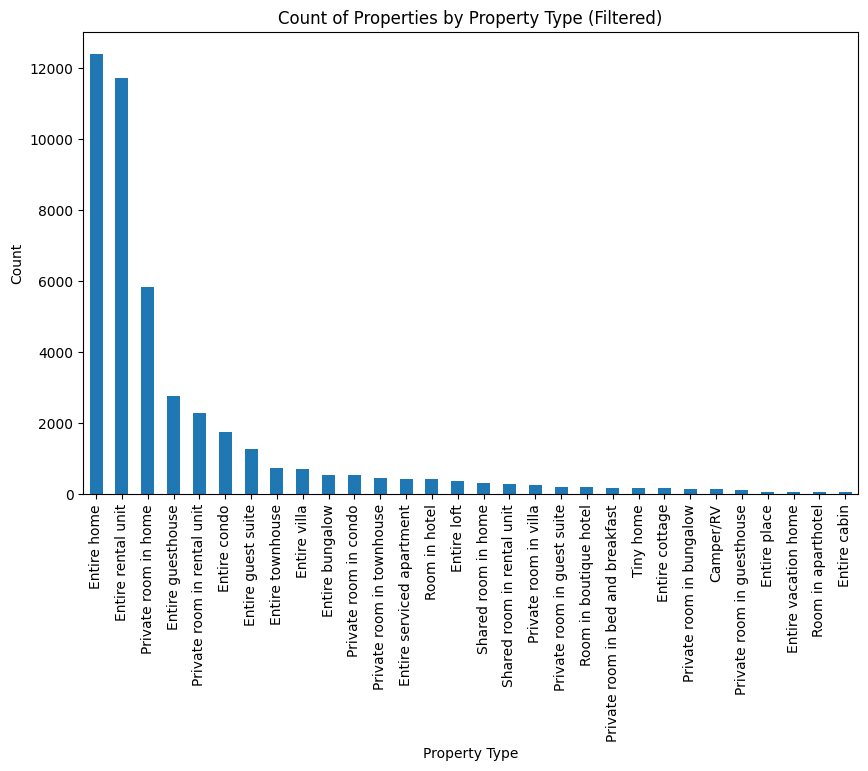

In [ ]:
# Establecer un umbral mínimo (por ejemplo, 50 propiedades como mínimo)
umbral_minimo = 50

# Contar las propiedades por tipo y filtrar aquellas con frecuencia mayor o igual al umbral
frecuencia_tipos = listings_df["property_type"].value_counts()
frecuencia_filtrada = frecuencia_tipos[frecuencia_tipos >= umbral_minimo]

# Crear el gráfico de barras con los tipos de propiedad filtrados
plt.figure(figsize=(10, 6))
frecuencia_filtrada.plot(kind='bar')

# Configurar título y etiquetas
plt.title("Count of Properties by Property Type (Filtered)")
plt.xlabel("Property Type")
plt.ylabel("Count")

# Mostrar el gráfico
plt.show()

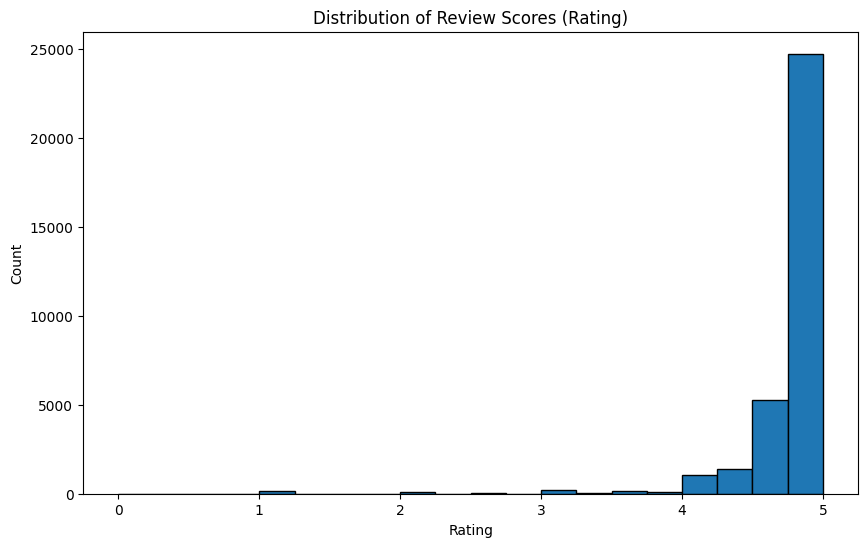

In [ ]:
# Histograma para la distribución de calificaciones
plt.figure(figsize=(10, 6))
plt.hist(listings_df["review_scores_rating"], bins=20, edgecolor='black')
plt.title("Distribution of Review Scores (Rating)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

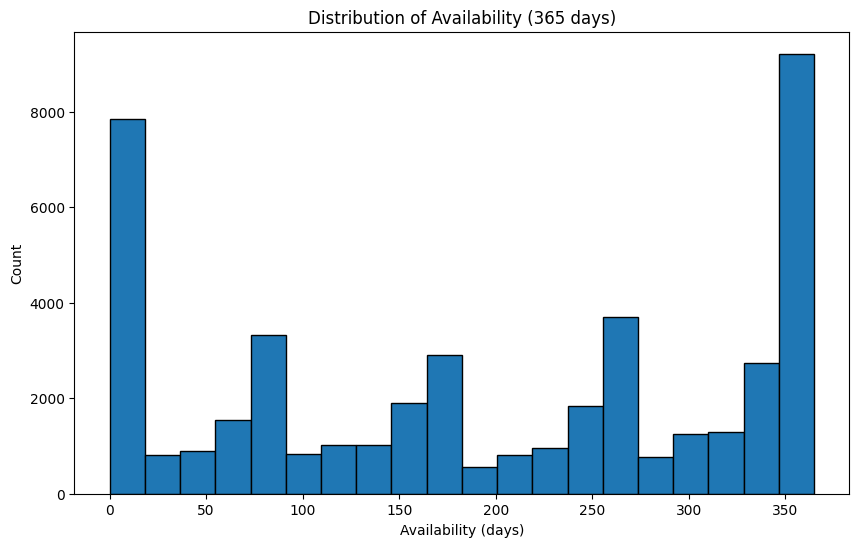

In [ ]:
# Histograma para la distribución de disponibilidad
plt.figure(figsize=(10, 6))
plt.hist(listings_df["availability_365"], bins=20, edgecolor='black')
plt.title("Distribution of Availability (365 days)")
plt.xlabel("Availability (days)")
plt.ylabel("Count")
plt.show()

In [ ]:
# 3. Top 5 Atributos para el Análisis
top_5_atributos = ['property_type', 'price', 'availability_365', 'number_of_reviews', 'review_scores_rating']

# Análisis Univariado
for atributo in top_5_atributos:
    print(f"\nAnálisis del atributo: {atributo}")

    # Si es numérico
    if pd.api.types.is_numeric_dtype(listings_df[atributo]):
        print(listings_df[atributo].describe())

    # Si es categórico
    elif pd.api.types.is_categorical_dtype(listings_df[atributo]) or listings_df[atributo].dtype == 'object':
        print(f"Valores únicos: {listings_df[atributo].nunique()}")
        print(listings_df[atributo].value_counts().head(5))


Análisis del atributo: property_type
Valores únicos: 100
property_type
Entire home                    12391
Entire rental unit             11723
Private room in home            5830
Entire guesthouse               2755
Private room in rental unit     2296
Name: count, dtype: int64

Análisis del atributo: price
count    37180.000000
mean       287.499274
std        709.939637
min          5.000000
25%         98.000000
50%        155.000000
75%        260.000000
max      56425.000000
Name: price, dtype: float64

Análisis del atributo: availability_365
count    45245.000000
mean       194.633285
std        133.348213
min          0.000000
25%         75.000000
50%        199.000000
75%        334.000000
max        365.000000
Name: availability_365, dtype: float64

Análisis del atributo: number_of_reviews
count    45245.000000
mean        36.838347
std         80.744670
min          0.000000
25%          0.000000
50%          6.000000
75%         34.000000
max       3024.000000
Name: num

<ipython-input-69-59026ae14792>:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(listings_df[atributo]) or listings_df[atributo].dtype == 'object':


### Remove some critical outliers based on listing price

In [ ]:
listings_df = listings_df.loc[listings_df["price"] <= (q3 + 1.5 * iqr)]

### Feature selection and data preparation

Quitamos variables con gran cantidad de nulos (más de 20 mil) y con gran variabilidad (más de 30 mil), también se quitaron variables inservibles para el análisis como pueden ser ids, o nombres de host

In [ ]:
# Filtering the column list by index
property_attributes = [listings_df.columns[12:14], listings_df.columns[15:19], listings_df.columns[21:24], listings_df.columns[28:30],
                       listings_df.columns[32:39], listings_df.columns[40:49], listings_df.columns[50:55], listings_df.columns[56:68],
                       listings_df.columns[69:75]]
# Unir todos los sub-arreglos en uno solo
property_attributes = [col for sublist in property_attributes for col in sublist]

# Mostrar el resultado
property_attributes

['host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 

In [ ]:
# Obtener la frecuencia de los barrios, ordenada de mayor a menor
neighbourhood_frequency = listings_df['neighbourhood_cleansed'].value_counts()

# Mostrar la frecuencia
print(neighbourhood_frequency)

neighbourhood_cleansed
Long Beach          1526
Hollywood           1259
Santa Monica        1229
Venice              1098
Beverly Hills       1097
                    ... 
Rancho Dominguez       2
Angeles Crest          2
Val Verde              2
East Compton           2
Elizabeth Lake         1
Name: count, Length: 265, dtype: int64


## Estrategia de análisis

La estrategia de análisis incluirá el cálculo de estadísticos descriptivos para comprender la distribución de precios, ocupación y otros atributos clave de las propiedades en los diferentes barrios. Se identificarán los barrios más comunes y los tipos de propiedad más frecuentes, además de calcular precios promedio y ocupación en cada uno. Esto permitirá un primer acercamiento para determinar las zonas y tipos de propiedades más valiosas para invertir. Posteriormente, se aplicarán pruebas estadísticas como la prueba t de Student para comparar la ocupación entre barrios caros y económicos, y la prueba U de Mann-Whitney para analizar diferencias en la ocupación entre propiedades caras y económicas. Estas pruebas ayudarán a validar si los barrios con precios más altos o más bajos ofrecerán mejores tasas de ocupación.

Se utilizarán además gráficas de boxplot y gráficos de barras para visualizar la distribución de precios y ocupación según barrios y tipos de propiedades, lo que permitirá analizar la variabilidad y tendencias en cada segmento. También se examinará la ocupación por rangos de precios, confirmando que las propiedades con precios más bajos tendrán una mejor ocupación. Esta combinación de técnicas gráficas y pruebas estadísticas proporcionará una visión clara de dónde estarán las mejores oportunidades de inversión inmobiliaria, destacando la importancia de balancear precio, ubicación y tipo de propiedad para maximizar ocupación y rentabilidad.

## Análisis de datos

In [ ]:
# Filtrar los barrios que tienen más de 500 propiedades
barrios_frecuentes = listings_df['neighbourhood_cleansed'].value_counts()
barrios_frecuentes_100 = barrios_frecuentes[barrios_frecuentes > 500].index

# Filtrar el DataFrame por esos barrios
filtered_df = listings_df[listings_df['neighbourhood_cleansed'].isin(barrios_frecuentes_100)]

# Calcular el precio promedio por barrio y ordenarlos de mayor a menor
precio_promedio_por_barrio_ordenado = filtered_df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

# Mostrar los barrios ordenados por su precio promedio
print(precio_promedio_por_barrio_ordenado)


neighbourhood_cleansed
Venice            220.112933
Santa Monica      203.827502
West Hollywood    203.060536
Glendale          188.196429
Beverly Hills     186.330902
Culver City       185.387795
Downtown          175.397564
Long Beach        172.516383
Pasadena          169.282953
Hollywood         156.686259
Alhambra          129.594937
Name: price, dtype: float64


Se escogen los 5 barrios con más propiedades para evitar el sesgo estadístico

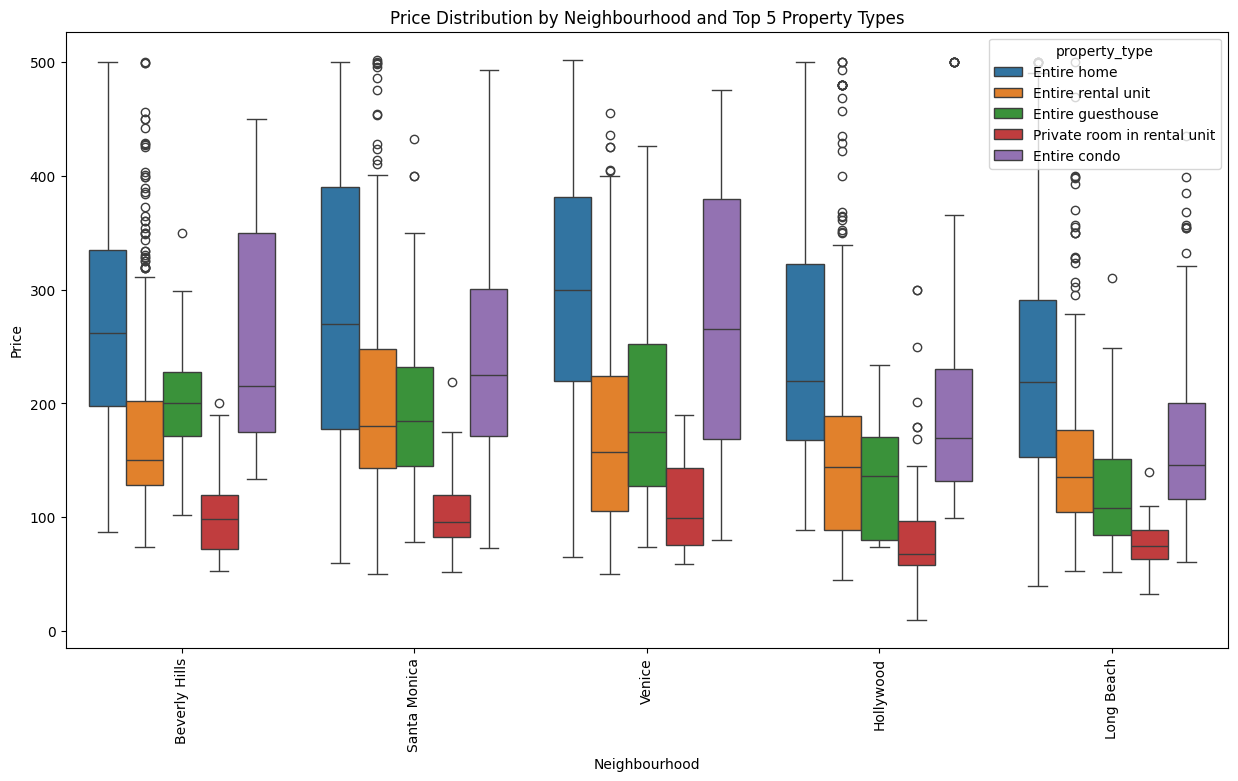

In [ ]:
# Obtener los 5 barrios más frecuentes
top_10_neighbourhoods = listings_df['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos barrios
filtered_df = listings_df[listings_df['neighbourhood_cleansed'].isin(top_10_neighbourhoods)]

# Obtener los 5 tipos de propiedad más frecuentes dentro de esos barrios
top_10_property_types = filtered_df['property_type'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos tipos de propiedad
filtered_df = filtered_df[filtered_df['property_type'].isin(top_10_property_types)]

# Crear un gráfico de caja para los 5 barrios más frecuentes y los 5 tipos de propiedad más frecuentes
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price', hue='property_type', data=filtered_df)

# Configurar títulos y etiquetas
plt.title('Price Distribution by Neighbourhood and Top 5 Property Types')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')

# Mostrar la gráfica
plt.xticks(rotation=90)  # Rotar los nombres de los barrios si son demasiados
plt.show()

Esta gráfica de boxplot muestra la distribución de precios de las propiedades en diferentes barrios, desglosadas por los 5 tipos de propiedad más comunes. Se observa que "Entire homes" (casa completa) y "Entire condos" tienden a tener precios más altos, particularmente en barrios como Beverly Hills y Santa Monica, donde los precios de las propiedades completas pueden superar los 400 por noche. Los tipos de propiedad más económicos, como las Private rooms in rental units, tienen una dispersión menor y precios más bajos, con medianas por debajo de 100, sobre todo en Venice y Long Beach.

<ipython-input-83-95e7f6c0dad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['availability_365'] = pd.to_numeric(listings_df['availability_365'], errors='coerce')
<ipython-input-83-95e7f6c0dad7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['occupancy_365'] = 365 - listings_df['availability_365']


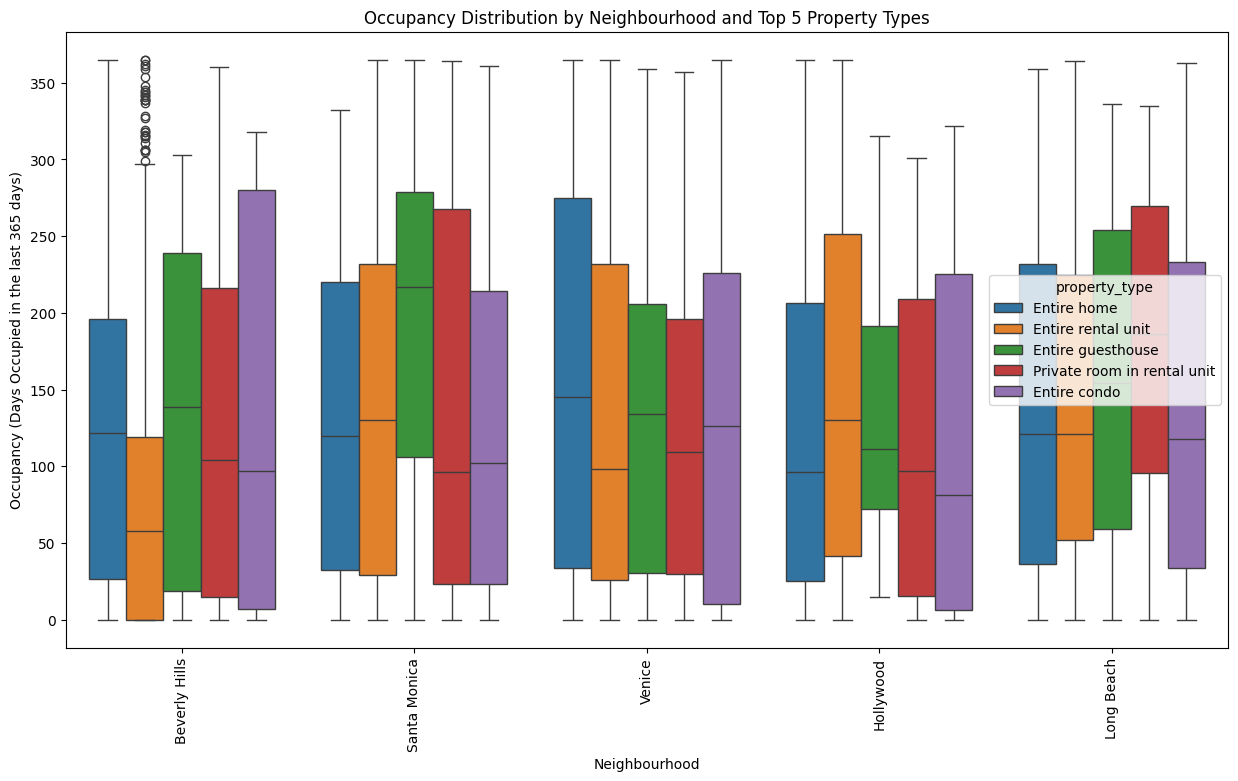

In [ ]:
# Asegurarte de que availability_365 esté en formato numérico (si no lo está ya)
listings_df['availability_365'] = pd.to_numeric(listings_df['availability_365'], errors='coerce')

# Crear una nueva columna para la ocupación como complemento de availability_365
listings_df['occupancy_365'] = 365 - listings_df['availability_365']

# Obtener los 5 barrios más frecuentes
top_5_neighbourhoods = listings_df['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos barrios
filtered_df = listings_df[listings_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Obtener los 5 tipos de propiedad más frecuentes dentro de esos barrios
top_5_property_types = filtered_df['property_type'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos tipos de propiedad
filtered_df = filtered_df[filtered_df['property_type'].isin(top_5_property_types)]

# Crear un gráfico de caja para los 5 barrios más frecuentes y los 5 tipos de propiedad más frecuentes usando la ocupación
plt.figure(figsize=(15, 8))
sns.boxplot(x='neighbourhood_cleansed', y='occupancy_365', hue='property_type', data=filtered_df)

# Configurar títulos y etiquetas
plt.title('Occupancy Distribution by Neighbourhood and Top 5 Property Types')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy (Days Occupied in the last 365 days)')

# Mostrar la gráfica
plt.xticks(rotation=90)  # Rotar los nombres de los barrios si son demasiados
plt.show()

Se observa que las propiedades completas, como Entire homes y Entire rental units, tienden a tener una ocupación más alta en la mayoría de los barrios, especialmente en Venice y Santa Monica, donde las ocupaciones alcanzan hasta 300 días. Los tipos de propiedad más económicos, como las Private rooms in rental units, tienden a tener una ocupación más baja en comparación con las propiedades completas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la ocupación como el complemento de availability_365
listings_df['occupancy_365'] = 365 - listings_df['availability_365']

# Obtener los 5 barrios más frecuentes
top_5_neighbourhoods = listings_df['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos barrios
filtered_df = listings_df[listings_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Obtener los 5 tipos de propiedad más frecuentes dentro de esos barrios
top_5_property_types = filtered_df['property_type'].value_counts().nlargest(5).index

# Filtrar el DataFrame por estos tipos de propiedad
filtered_df = filtered_df[filtered_df['property_type'].isin(top_5_property_types)]

# Dividir los datos en rangos de precios (puedes ajustar los rangos según tus necesidades)
filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=[0, 50, 100, 150, 200, 300, 500, 1000, 5000],
                                    labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501-1000', '1000+'])

# Calcular la ocupación promedio por rango de precios
occupancy_by_price_range = filtered_df.groupby('price_range')['occupancy_365'].mean().sort_values(ascending=False)

# Mostrar los resultados
print("Ocupación promedio por rango de precios (mayor a menor):")
print(occupancy_by_price_range)


Ocupación promedio por rango de precios (mayor a menor):
price_range
0-50        157.437500
51-100      145.246377
201-300     138.967273
151-200     136.167614
301-500     128.508716
101-150     119.753357
501-1000     48.000000
1000+              NaN
Name: occupancy_365, dtype: float64


<ipython-input-84-68312dd2b711>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df['occupancy_365'] = 365 - listings_df['availability_365']
<ipython-input-84-68312dd2b711>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_by_price_range = filtered_df.groupby('price_range')['occupancy_365'].mean().sort_values(ascending=False)


<ipython-input-95-92117ca3324e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_neighbourhoods_df['price_range'] = pd.cut(filtered_neighbourhoods_df['price'],
<ipython-input-95-92117ca3324e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_by_price_range_and_neighbourhood = filtered_neighbourhoods_df.groupby(['neighbourhood_cleansed', 'price_range'])['occupancy_365'].mean().unstack()


<Figure size 1500x800 with 0 Axes>

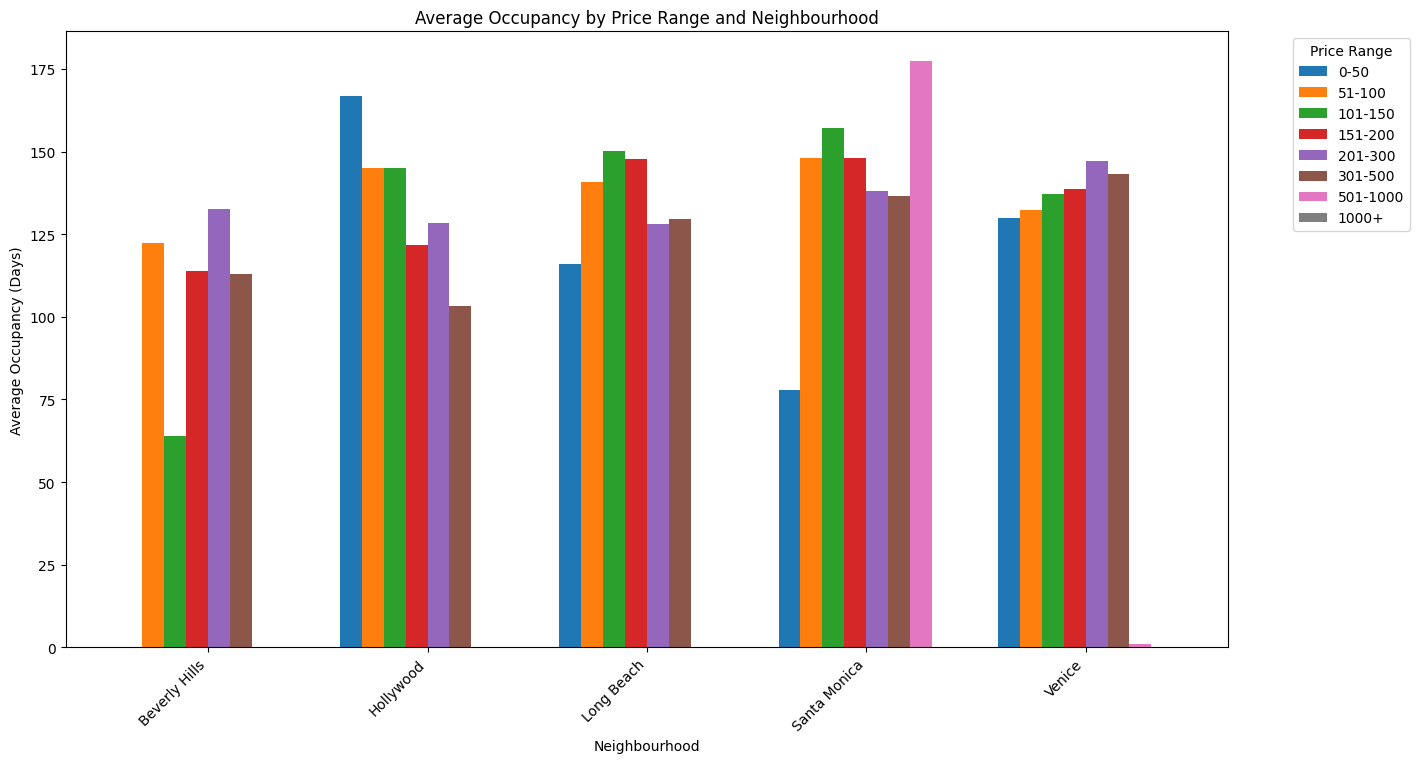

In [ ]:
# Filtrar el DataFrame solo por los top 5 neighbourhoods
filtered_neighbourhoods_df = listings_df[listings_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Dividir los datos en rangos de precios
filtered_neighbourhoods_df['price_range'] = pd.cut(filtered_neighbourhoods_df['price'],
                                                   bins=[0, 50, 100, 150, 200, 300, 500, 1000, 5000],
                                                   labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501-1000', '1000+'])

# Calcular la ocupación promedio por rango de precios y barrio
occupancy_by_price_range_and_neighbourhood = filtered_neighbourhoods_df.groupby(['neighbourhood_cleansed', 'price_range'])['occupancy_365'].mean().unstack()

# Crear la gráfica de barras para mostrar ocupación por barrio y rango de precios
plt.figure(figsize=(15, 8))
occupancy_by_price_range_and_neighbourhood.plot(kind='bar', figsize=(15, 8), width=0.8)

# Configurar títulos y etiquetas
plt.title('Average Occupancy by Price Range and Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Occupancy (Days)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.xticks(rotation=45, ha='right')
plt.show()

Se puede observar que los barrios con precios más bajos (rango de $0-$50 y $51-$100) tienden a tener una ocupación promedio más alta, especialmente en Hollywood y Beverly Hills, donde las propiedades en esos rangos tienen ocupaciones superiores a los 150 días. Sin embargo, a medida que los precios aumentan, la ocupación tiende a disminuir en todos los barrios, con una clara caída en el rango de $501-$1000. Esto sugiere que las propiedades más económicas son más atractivas en términos de ocupación, especialmente en barrios populares como Hollywood y Venice.

<ipython-input-101-5fbcd061e1f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_property_df['price_range'] = pd.cut(filtered_property_df['price'],
<ipython-input-101-5fbcd061e1f9>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_by_price_range_and_property_type = filtered_property_df.groupby(['property_type', 'price_range'])['occupancy_365'].mean().unstack()


<Figure size 1500x800 with 0 Axes>

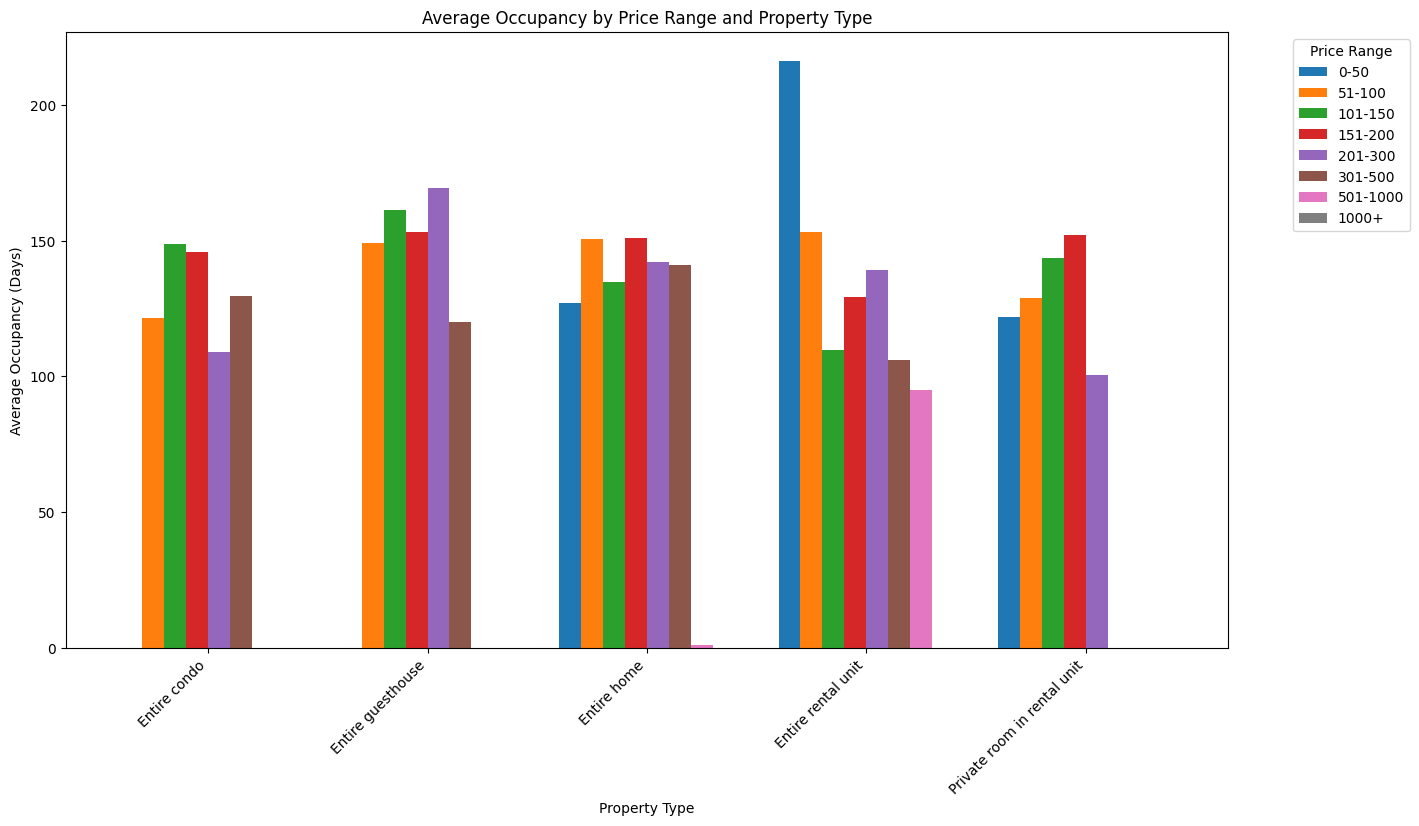

In [ ]:
# Filtrar el DataFrame por estos barrios
filtered_df = listings_df[listings_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Filtrar el DataFrame por estos tipos de propiedad
filtered_property_df = filtered_df[filtered_df['property_type'].isin(top_5_property_types)]

# Dividir los datos en rangos de precios
filtered_property_df['price_range'] = pd.cut(filtered_property_df['price'],
                                             bins=[0, 50, 100, 150, 200, 300, 500, 1000, 5000],
                                             labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501-1000', '1000+'])

# Calcular la ocupación promedio por rango de precios y tipo de propiedad
occupancy_by_price_range_and_property_type = filtered_property_df.groupby(['property_type', 'price_range'])['occupancy_365'].mean().unstack()

# Crear un gráfico de barras lado a lado (en lugar de apilado)
plt.figure(figsize=(15, 8))
occupancy_by_price_range_and_property_type.plot(kind='bar', figsize=(15, 8), width=0.8)

# Configurar títulos y etiquetas
plt.title('Average Occupancy by Price Range and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Occupancy (Days)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.xticks(rotation=45, ha='right')
plt.show()

Se observa que las Entire rental units en el rango de $0-50 tienen la mayor ocupación, superando los 200 días, lo que indica que las propiedades más económicas tienden a tener más demanda. Los Entire homes y Entire guesthouses también tienen una ocupación relativamente alta en rangos de precios bajos y medios, mientras que las Private rooms in rental units tienden a tener la menor ocupación en todos los rangos de precios, lo que sugiere que los huéspedes prefieren alquilar propiedades completas en lugar de habitaciones privadas, incluso si el precio es más bajo.

## Pruebas estadísticas

### Pregunta 1
¿Las propiedades en barrios más caros tienen una mayor ocupación que las propiedades en barrios más económicos?

Hipótesis para la prueba estadística:
- Hipótesis nula (H₀): No hay diferencia significativa en la ocupación promedio entre las propiedades en barrios caros y barrios económicos.
- Hipótesis alternativa (H₁): Las propiedades en barrios caros tienen una ocupación promedio significativamente mayor (o menor) que las propiedades en barrios económicos.

Prueba t de Student (independiente): Esta prueba nos permite comparar si las medias de ocupación entre los dos grupos (barrios caros vs barrios económicos) son significativamente diferentes.

In [ ]:
# Calcular el precio promedio por barrio
average_price_by_neighbourhood = listings_df.groupby('neighbourhood_cleansed')['price'].mean()

# Dividir los barrios en dos grupos: "caros" y "económicos" (por encima y por debajo de la mediana del precio promedio)
median_price = average_price_by_neighbourhood.median()
expensive_neighbourhoods = average_price_by_neighbourhood[average_price_by_neighbourhood > median_price].index
cheap_neighbourhoods = average_price_by_neighbourhood[average_price_by_neighbourhood <= median_price].index

# Filtrar los datos por estos grupos
expensive_properties = listings_df[listings_df['neighbourhood_cleansed'].isin(expensive_neighbourhoods)]
cheap_properties = listings_df[listings_df['neighbourhood_cleansed'].isin(cheap_neighbourhoods)]

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(expensive_properties['occupancy_365'].dropna(),
                                  cheap_properties['occupancy_365'].dropna())

# Mostrar los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Hay una diferencia significativa en la ocupación promedio entre barrios caros y barrios económicos.")
else:
    print("No hay una diferencia significativa en la ocupación promedio entre barrios caros y barrios económicos.")

Estadístico t: 0.24019826534824837
Valor p: 0.8101780193335647
No hay una diferencia significativa en la ocupación promedio entre barrios caros y barrios económicos.


### Pregunta 2
¿Las propiedades con precios más altos tienen una menor disponibilidad (mayor ocupación) en comparación con las propiedades más económicas?

Hipótesis para la prueba estadística:
- Hipótesis nula (H₀): No hay una diferencia significativa en la ocupación - promedio entre las propiedades caras y económicas.
- Hipótesis alternativa (H₁): Las propiedades más caras tienen una ocupación significativamente diferente en comparación con las propiedades más económicas.

Prueba U de Mann-Whitney: Dado que podríamos estar comparando distribuciones de ocupación que no necesariamente siguen una distribución normal (especialmente en el caso de propiedades muy caras o muy económicas), utilizamos la prueba U de Mann-Whitney, una prueba no paramétrica que compara las distribuciones de dos grupos.

In [ ]:
# Dividir las propiedades en dos grupos basados en el precio mediano
median_price = listings_df['price'].median()
expensive_properties = listings_df[listings_df['price'] > median_price]
cheap_properties = listings_df[listings_df['price'] <= median_price]

# Realizar la prueba U de Mann-Whitney
u_stat, p_value = stats.mannwhitneyu(expensive_properties['occupancy_365'].dropna(),
                                     cheap_properties['occupancy_365'].dropna())

# Mostrar los resultados
print(f"Estadístico U: {u_stat}")
print(f"Valor p: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Hay una diferencia significativa en la ocupación promedio entre las propiedades caras y económicas.")
else:
    print("No hay una diferencia significativa en la ocupación promedio entre las propiedades caras y económicas.")

Estadístico U: 139865978.5
Valor p: 0.017644847980608315
Hay una diferencia significativa en la ocupación promedio entre las propiedades caras y económicas.


## Insights

1. A pesar de la diferencia en los precios de las propiedades, la ocupación se mantiene relativamente similar, lo que podría indicar que la demanda es estable en estos vecindarios, sin importar si son caros o económicos.

2. Las propiedades más caras tienen una ocupación diferente (probablemente menor) en comparación con las propiedades más económicas, lo cual tiene sentido: las propiedades más caras tienden a tener una menor ocupación porque son menos accesibles para los viajeros de presupuesto limitado.

3. En las dos gráficas (precios y ocupación por tipos de propiedad en los 5 vecindarios más frecuentes), vemos que:
- Venice, Santa Monica y Beverly Hills tienden a tener propiedades con precios más altos en general, y el tipo de propiedad más caro suele ser "Entire home" (casa completa).
- Las Private rooms (habitaciones privadas) y Entire rental units tienen precios significativamente más bajos en comparación con las casas enteras.
- En términos de ocupación, parece que Venice y Santa Monica tienen una ocupación media-alta para casi todos los tipos de propiedad, aunque hay una alta variabilidad (indicado por la longitud de los bigotes en el boxplot).
- Las propiedades en Hollywood y Long Beach tienen una ocupación más equilibrada, con menos variabilidad entre los tipos de propiedad.

4. No hay diferencia significativa en la ocupación entre barrios caros y económicos, pero hay una diferencia significativa entre propiedades caras y económicas. Esto implica que, aunque algunos barrios sean más caros, la ocupación general no cambia mucho, pero las propiedades individuales más caras tienden a tener menos ocupación.

5. Propiedades más económicas (especialmente las de rangos de 0-50 y 51-100) tienen la mejor ocupación, lo que las hace atractivas para inversionistas que buscan maximizar la ocupación en lugar de solo obtener altos ingresos por noche.

6. Al ver las gráficas también podemos apreciar que los sitios más deseables son Venice y Santa Mónica, siendo las propiedades de un precio mayor a 51 las más deseables debido a su ocupación.

7. Mayor ocupación en propiedades completas:

- Los tipos de propiedad como Entire rental units y Entire homes parecen tener consistentemente mayores niveles de ocupación en comparación con otros tipos de propiedades, como Private rooms. Esto puede sugerir que los viajeros prefieren alquilar propiedades completas, especialmente si están disponibles a precios competitivos.

## Conclusion final

La mejor opción de inversión sería comprar una propiedad en Venice, que es el barrio con el precio promedio más alto ($220.11) pero también mantiene una alta ocupación en casi todos los rangos de precios y tipos de propiedad. Venice combina un precio competitivo con una demanda estable, lo que sugiere una buena oportunidad de rentabilidad.

El tipo de propiedad más recomendable sería un "Entire rental unit", ya que este tipo de propiedad muestra consistentemente una alta ocupación, incluso en rangos de precios más altos. Además, los Entire homes y Entire rental units tienden a ser más populares entre los viajeros, maximizando así las posibilidades de mantener la propiedad ocupada durante más días al año.

El rango de precios más adecuado para maximizar tanto ocupación como ingresos estaría entre 151 y 300 dolares, ya que este rango ha mostrado una buena combinación de ocupación y rentabilidad, con ocupaciones promedio superiores a los 130 días al año. Este equilibrio entre un precio accesible para los huéspedes y una alta demanda aseguraría una inversión sólida y rentable a largo plazo.